In [48]:
!pip install scikit-fuzzy

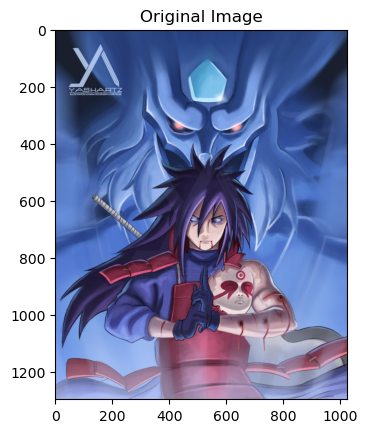

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('M_U.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image)
plt.title("Original Image")
plt.show()

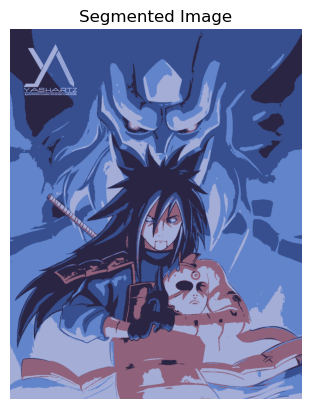

In [50]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suppress the warning by setting the environment variable
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Replace '4' with the number of cores you want to use

def image_clustering_segmentation(image_path, num_clusters):
    """
    Performs image segmentation using K-means clustering.

    Args:
        image_path: Path to the image file.
        num_clusters: Number of clusters to use for segmentation.

    Returns:
        A tuple containing:
            - segmented_image: The segmented image as a NumPy array.
            - cluster_centers: The cluster centers.
    """

    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(pixels)

    # Get cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Create the segmented image
    segmented_image = cluster_centers[labels].reshape(image.shape)

    return segmented_image, cluster_centers

# Example usage
image_path = 'M_U.jpg'  # Replace with the actual image path
num_clusters = 5  # Adjust the number of clusters as needed

segmented_image, cluster_centers = image_clustering_segmentation(image_path, num_clusters)

# Display the segmented image using matplotlib
plt.imshow(segmented_image.astype(np.uint8))
plt.title("Segmented Image")
plt.axis('off')
plt.show()

# 1. K-means Clustering

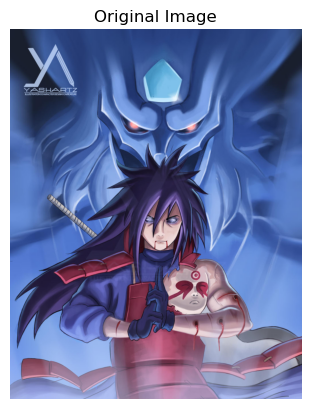

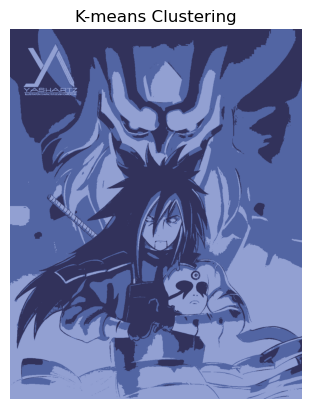

In [52]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suppress the warning by setting the environment variable
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Replace '4' with the number of cores you want to use

# Load the image
image = cv2.imread('M_U.jpg')  # Make sure to replace 'M_U.jpg' with the path to your image file
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB

# Display the original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Reshape image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Number of clusters
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Replace each pixel value with its corresponding cluster center
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img.astype(np.uint8))
plt.title("K-means Clustering")
plt.axis('off')
plt.show()

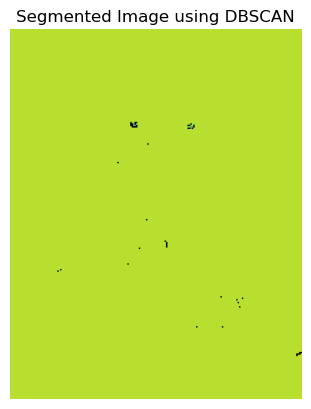

In [124]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def image_clustering_segmentation_dbscan(image_path, eps, min_samples, downsample_factor=0.5):
    """
    Performs image segmentation using DBSCAN clustering.

    Args:
        image_path: Path to the image file.
        eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
        min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
        downsample_factor: Factor by which to downsample the image.

    Returns:
        A tuple containing:
            - segmented_image: The segmented image as a NumPy array.
            - labels: The cluster labels for each pixel.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Downsample the image to reduce computational load
    height, width, _ = image.shape
    new_height, new_width = int(height * downsample_factor), int(width * downsample_factor)
    image = cv2.resize(image, (new_width, new_height))

    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pixels)

    # Create the segmented image
    unique_labels = np.unique(labels)
    segmented_image = np.zeros_like(pixels)

    for label in unique_labels:
        if label == -1:
            # Noise points
            color = [0, 0, 0]
        else:
            color = np.random.randint(0, 255, size=3)
        segmented_image[labels == label] = color

    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image, labels

# Example usage
image_path = 'M_U.jpg'  # Replace with the actual image path
eps = 10  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # The number of samples in a neighborhood for a point to be considered as a core point
downsample_factor = 0.2  # Adjust the downsample factor as needed

segmented_image, labels = image_clustering_segmentation_dbscan(image_path, eps, min_samples, downsample_factor)

# Display the segmented image using matplotlib
plt.imshow(segmented_image.astype(np.uint8))
plt.title("Segmented Image using DBSCAN")
plt.axis('off')
plt.show()

# 2. Mean Shift Clustering

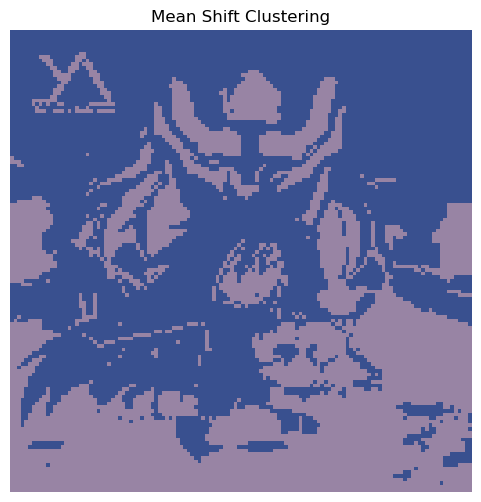

In [54]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = "M_U.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to reduce computational load (optional)
image = cv2.resize(image, (128, 128))  # Further reduce the size if needed

# Reshape image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Use a random subset of pixels for bandwidth estimation
subset_size = 1000  # Adjust the subset size as needed
random_indices = np.random.choice(pixels.shape[0], subset_size, replace=False)
subset_pixels = pixels[random_indices]

# Estimate bandwidth for Mean Shift with adjusted parameters
bandwidth = estimate_bandwidth(subset_pixels, quantile=0.2, n_samples=500)  # Reduce n_samples if needed

# Apply Mean Shift clustering using the subset of pixels for fitting
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(subset_pixels)

# Predict cluster labels for all pixels
labels = meanshift.predict(pixels)

# Replace each pixel value with its corresponding cluster center
segmented_img = meanshift.cluster_centers_[labels]
segmented_img = segmented_img.reshape(image.shape)

# Display the segmented image
plt.figure(figsize=(6, 6))
plt.imshow(segmented_img.astype(np.uint8))
plt.title("Mean Shift Clustering")
plt.axis("off")
plt.show()

# 3. Fuzzy C-means Clustering

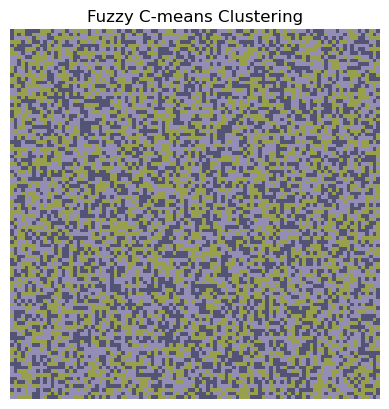

In [56]:
# Install skfuzzy if not already installed
!pip install scikit-fuzzy

import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'image' variable is already defined and contains the image data
# For demonstration purposes, let's create a random image
# Comment this out if you already have an image variable
image = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8)

# Reshape image to a 2D array of pixels
pixels = image.reshape(-1, 3).astype(np.float64)

# Number of clusters
n_clusters = 3
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(pixels.T, n_clusters, 2, error=0.005, maxiter=1000)

# Assign each pixel to the cluster with the highest membership value
labels = np.argmax(u, axis=0)
segmented_img = cntr[labels]
segmented_img = segmented_img.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img.astype(np.uint8))
plt.title("Fuzzy C-means Clustering")
plt.axis('off')
plt.show()

# 4. Hierarchical Clustering

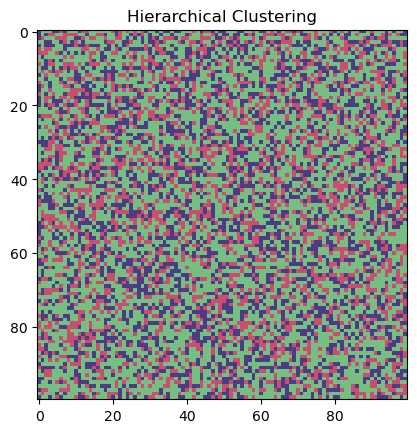

In [58]:
from sklearn.cluster import AgglomerativeClustering

# Reshape image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Number of clusters
n_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
labels = hierarchical.fit_predict(pixels)

# Replace each pixel value with its corresponding cluster center
segmented_img = np.zeros_like(pixels)
for i in range(n_clusters):
    segmented_img[labels == i] = np.mean(pixels[labels == i], axis=0)
segmented_img = segmented_img.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img.astype(np.uint8))
plt.title("Hierarchical Clustering")
plt.show()

# 5. Gaussian Mixture Models (GMM)

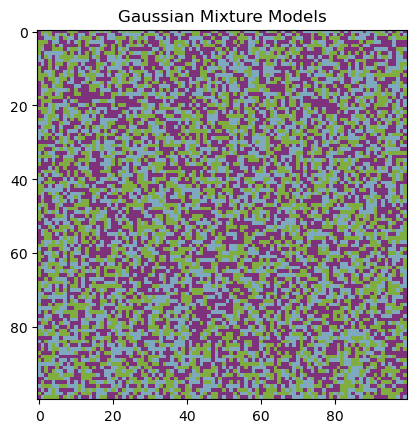

In [60]:
from sklearn.mixture import GaussianMixture

# Reshape image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Number of clusters
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(pixels)

# Replace each pixel value with its corresponding cluster center
labels = gmm.predict(pixels)
segmented_img = gmm.means_[labels]
segmented_img = segmented_img.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img.astype(np.uint8))
plt.title("Gaussian Mixture Models")
plt.show()

# 6. Spectral Clustering

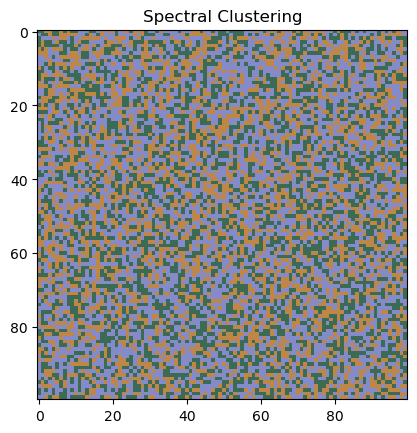

In [62]:
from sklearn.cluster import SpectralClustering

# Reshape image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Number of clusters
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(pixels)

# Replace each pixel value with its corresponding cluster center
segmented_img = np.zeros_like(pixels)
for i in range(n_clusters):
    segmented_img[labels == i] = np.mean(pixels[labels == i], axis=0)
segmented_img = segmented_img.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img.astype(np.uint8))
plt.title("Spectral Clustering")
plt.show()

# 7. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

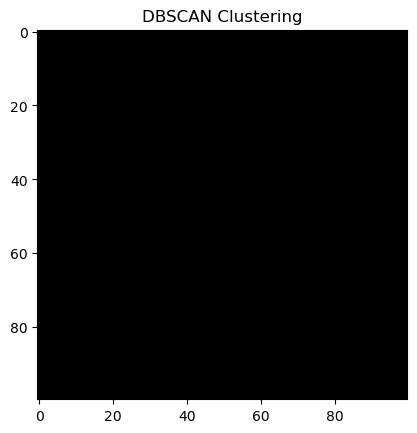

In [64]:
from sklearn.cluster import DBSCAN

# Reshape image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=100)
labels = dbscan.fit_predict(pixels)

# Replace each pixel value with its corresponding cluster center
unique_labels = np.unique(labels)
segmented_img = np.zeros_like(pixels)
for label in unique_labels:
    if label != -1:  # Ignore noise points
        segmented_img[labels == label] = np.mean(pixels[labels == label], axis=0)
segmented_img = segmented_img.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img.astype(np.uint8))
plt.title("DBSCAN Clustering")
plt.show()

# 8. Agglomerative Clustering

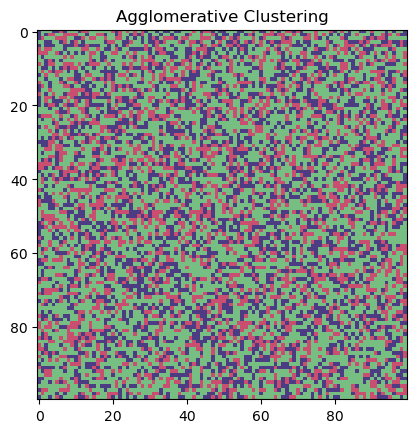

In [66]:
from sklearn.cluster import AgglomerativeClustering

# Reshape image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Number of clusters
n_clusters = 3
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
labels = agglomerative.fit_predict(pixels)

# Replace each pixel value with its corresponding cluster center
segmented_img = np.zeros_like(pixels)
for i in range(n_clusters):
    segmented_img[labels == i] = np.mean(pixels[labels == i], axis=0)
segmented_img = segmented_img.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img.astype(np.uint8))
plt.title("Agglomerative Clustering")
plt.show()

# 9. Affinity Propagation

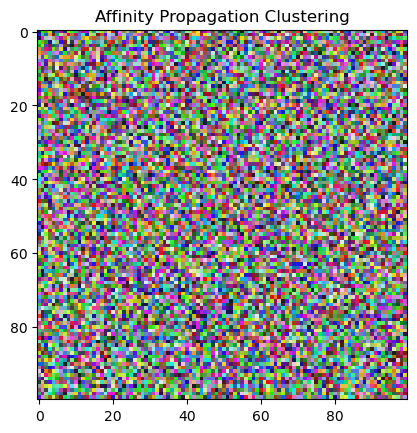

In [68]:
from sklearn.cluster import AffinityPropagation

# Reshape image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Perform Affinity Propagation clustering
affinity_propagation = AffinityPropagation()
affinity_propagation.fit(pixels)

# Replace each pixel value with its corresponding cluster center
labels = affinity_propagation.labels_
unique_labels = np.unique(labels)
segmented_img = np.zeros_like(pixels)
for label in unique_labels:
    segmented_img[labels == label] = np.mean(pixels[labels == label], axis=0)
segmented_img = segmented_img.reshape(image.shape)

# Display the segmented image
plt.imshow(segmented_img.astype(np.uint8))
plt.title("Affinity Propagation Clustering")
plt.show()

# 10. Image Segmentation by Clustering for k value 3.

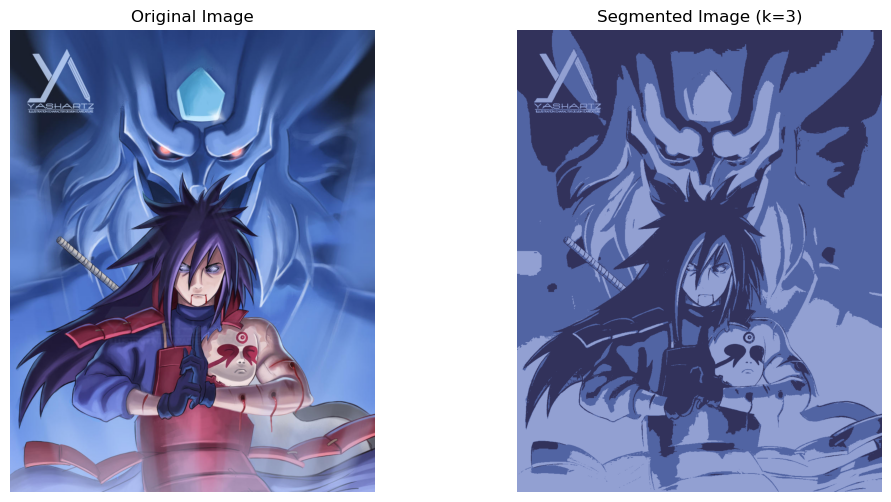

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = "M_U.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply K-means clustering
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters (segments)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (pixel values)
centers = np.uint8(centers)

# Map the labels to the center values to create the segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (k={k})")
plt.imshow(segmented_image)
plt.axis("off")

plt.show()

# 11. Image Segmentation by Clustering for k value 2.

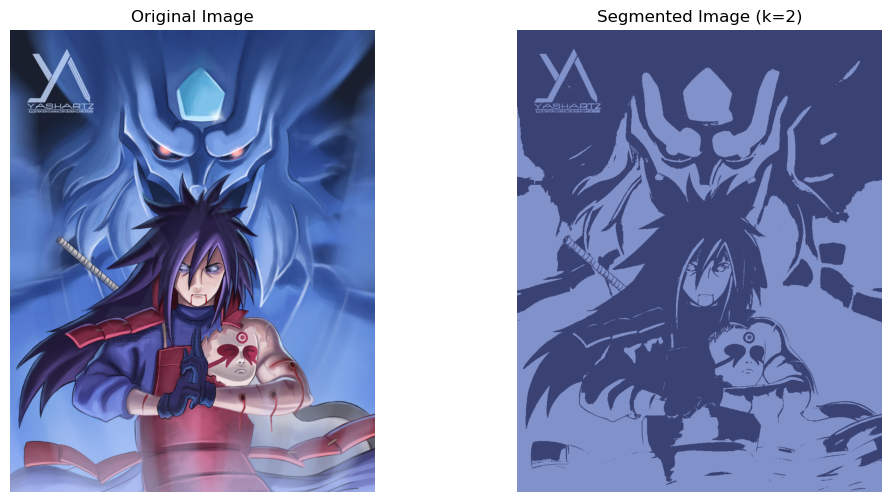

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = "M_U.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply K-means clustering
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2  # Set the number of clusters to 2
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (pixel values)
centers = np.uint8(centers)

# Map the labels to the center values to create the segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (k={k})")
plt.imshow(segmented_image)
plt.axis("off")

plt.show()

# 12. Finding the Optimal K-value through Elbow method.

Optimal number of clusters (k) found: 9


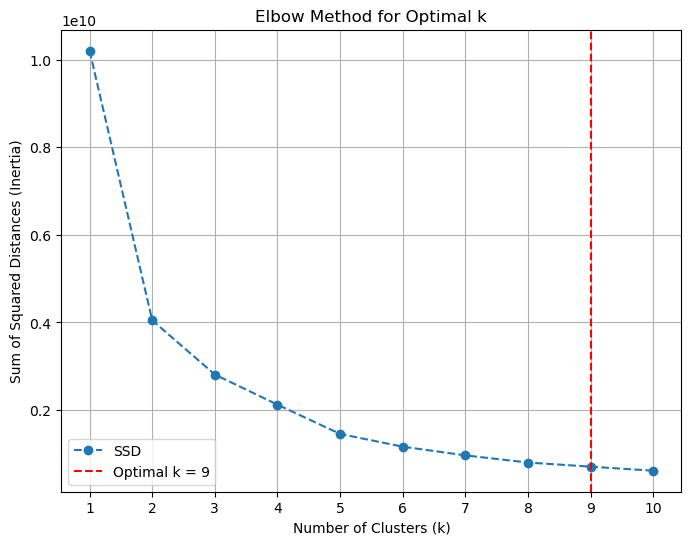

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = "M_U.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria for K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# List to store the sum of squared distances (inertia)
ssd = []

# Test different values of k (from 1 to 10)
k_values = range(1, 11)
for k in k_values:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Compute the sum of squared distances (SSD)
    ssd.append(np.sum((pixel_values - centers[labels.flatten()]) ** 2))

# Find the optimal k using the Elbow Method (maximum curvature)
def find_elbow(ssd, k_values):
    # Compute the second derivative of SSD
    diff = np.diff(ssd, 2)
    optimal_k = k_values[np.argmin(diff) + 1]
    return optimal_k

# Get the optimal k value
optimal_k = find_elbow(ssd, k_values)
print(f"Optimal number of clusters (k) found: {optimal_k}")

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd, marker='o', linestyle='--', label='SSD')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

# 13. Image Preprocessing and Optimal K-means Clustering for Segmentation

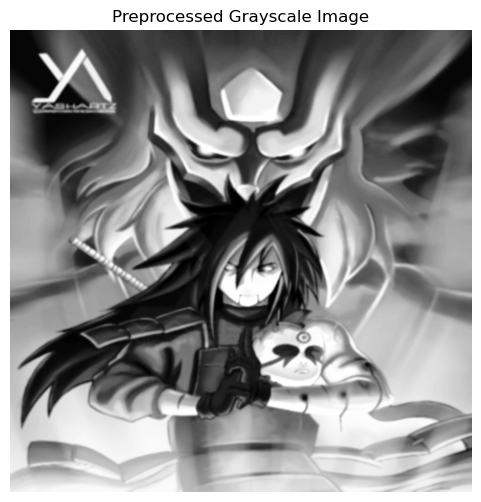

Optimal number of clusters (k) found: 9


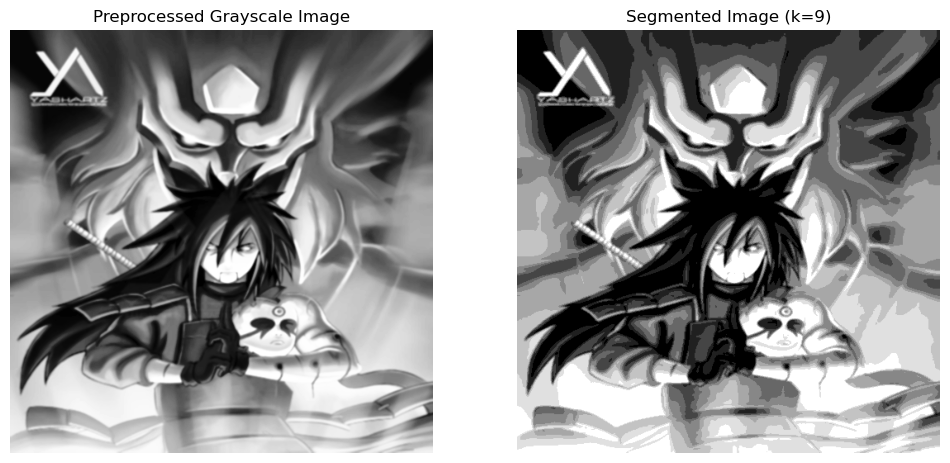

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = "M_U.jpg"
image = cv2.imread(image_path)

# Resize the image (optional step to reduce computational load)
image = cv2.resize(image, (512, 512))

# Apply Gaussian Blurring to reduce noise
image = cv2.GaussianBlur(image, (5, 5), 0)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization to improve contrast
gray_image = cv2.equalizeHist(gray_image)

# Display the preprocessed grayscale image
plt.figure(figsize=(6, 6))
plt.title("Preprocessed Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.show()

# Reshape the grayscale image to a 2D array of pixels
pixel_values = gray_image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

# Define criteria for K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# List to store the sum of squared distances (inertia)
ssd = []

# Test different values of k (from 1 to 10)
k_values = range(1, 11)
for k in k_values:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Compute the sum of squared distances (SSD)
    ssd.append(np.sum((pixel_values - centers[labels.flatten()]) ** 2))

# Function to find the optimal k value using the Elbow Method
def find_elbow(ssd, k_values):
    diff = np.diff(ssd, 2)
    optimal_k = k_values[np.argmin(diff) + 1]
    return optimal_k

# Get the optimal k value
optimal_k = find_elbow(ssd, k_values)
print(f"Optimal number of clusters (k) found: {optimal_k}")

# Apply K-means clustering with the optimal k
_, labels, centers = cv2.kmeans(pixel_values, optimal_k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (pixel values)
centers = np.uint8(centers)

# Map the labels to the center values to create the segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(gray_image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Preprocessed Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (k={optimal_k})")
plt.imshow(segmented_image, cmap='gray')
plt.axis("off")

plt.show()